In [3]:
#Part 1-Data Preprocessing

# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#importing the traning set
dataset_train=pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
traning_set=dataset_train.iloc[:,1:2].values

In [13]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
traning_set_scaled=sc.fit_transform(traning_set)

In [15]:
#creating a datastructure with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(traning_set_scaled[i-60:i,0])
    y_train.append(traning_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
# Part-2 - Building RNN Network

#Importing the keras libraries from and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [24]:
#initialising RNN
regressor=Sequential()

In [25]:
#Adding the first LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.20))
#Adding the second LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.20))
#Adding the third LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.20))
#Adding the forth LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.20))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
#Adding the output layers
regressor.add(Dense(units=1))

In [27]:
# compling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
# Fitting the RNN into the traning set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0593
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048A: 2s - lo
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042A: 2s - los - ETA: 0s - loss: 0
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/ste

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 93/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 94/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016A: 1s - loss: 
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014A: 0s - loss: 
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013


In [61]:
# part 3-making rediction and visualisation of result
dataset_test=pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [62]:
#Getting the predicted stock price 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)

In [63]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [64]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

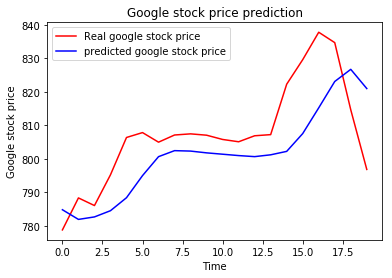

In [65]:
#visualising the result
plt.plot(real_stock_price,color='red',label='Real google stock price')
plt.plot(predict_stock_price,color='blue',label='predicted google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()